# Exploratory Data Analysis
Roshni Joshi- 21BDS0338

## 1. Data cleaning

In [ ]:
import pandas as pd

#1. Load the dataset
file_path = "Suicide data.csv"
data = pd.read_csv(file_path)

# Exploring the dimensions and summary of the dataset
data_shape = data.shape
data_summary = data.describe(include='all')
data_head = data.head()

data_shape, data_summary, data_head


((27820, 12),
           country          year    sex          age   suicides_no  \
 count       27820  27820.000000  27820        27820  27820.000000   
 unique        101           NaN      2            6           NaN   
 top     Mauritius           NaN   male  15-24 years           NaN   
 freq          382           NaN  13910         4642           NaN   
 mean          NaN   2001.258375    NaN          NaN    242.574407   
 std           NaN      8.469055    NaN          NaN    902.047917   
 min           NaN   1985.000000    NaN          NaN      0.000000   
 25%           NaN   1995.000000    NaN          NaN      3.000000   
 50%           NaN   2002.000000    NaN          NaN     25.000000   
 75%           NaN   2008.000000    NaN          NaN    131.000000   
 max           NaN   2016.000000    NaN          NaN  22338.000000   
 
           population  suicides/100k pop country-year  HDI for year  \
 count   2.782000e+04       27820.000000        27820   8364.000000   
 u

In [ ]:
#2. Data Cleaning
print(data.columns)
data.columns = data.columns.str.strip()  # Removes any leading/trailing whitespace

# Convert 'gdp_for_year ($)' to a numerical format by removing commas
data['gdp_for_year ($)'] = data['gdp_for_year ($)'].replace({',': ''}, regex=True).astype(float)

# Check for missing values in each column
missing_values = data.isnull().sum()

# Drop rows with missing values in 'HDI for year' for simplicity in further analysis
data_cleaned = data.dropna(subset=['HDI for year'])

# Verify cleaning results
missing_values_after = data_cleaned.isnull().sum()

missing_values, missing_values_after, data_cleaned.head()


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')


(country                   0
 year                      0
 sex                       0
 age                       0
 suicides_no               0
 population                0
 suicides/100k pop         0
 country-year              0
 HDI for year          19456
 gdp_for_year ($)          0
 gdp_per_capita ($)        0
 generation                0
 dtype: int64,
 country               0
 year                  0
 sex                   0
 age                   0
 suicides_no           0
 population            0
 suicides/100k pop     0
 country-year          0
 HDI for year          0
 gdp_for_year ($)      0
 gdp_per_capita ($)    0
 generation            0
 dtype: int64,
     country  year     sex          age  suicides_no  population  \
 72  Albania  1995    male  25-34 years           13      232900   
 73  Albania  1995    male  55-74 years            9      178000   
 74  Albania  1995  female    75+ years            2       40800   
 75  Albania  1995  female  15-24 years           

In [ ]:
#3. Check exact column names to identify any hidden characters or whitespace
data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
#4. Renaming the column to remove extra spaces
data.rename(columns={' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace=True)

# Convert 'gdp_for_year ($)' to a numerical format by removing commas
data['gdp_for_year ($)'] = data['gdp_for_year ($)'].replace({',': ''}, regex=True).astype(float)

# Check for missing values in each column
missing_values = data.isnull().sum()

# Drop rows with missing values in 'HDI for year' for simplicity in further analysis
data_cleaned = data.dropna(subset=['HDI for year'])

# Verify cleaning results
missing_values_after = data_cleaned.isnull().sum()

missing_values, missing_values_after, data_cleaned.head()


(country                   0
 year                      0
 sex                       0
 age                       0
 suicides_no               0
 population                0
 suicides/100k pop         0
 country-year              0
 HDI for year          19456
 gdp_for_year ($)          0
 gdp_per_capita ($)        0
 generation                0
 dtype: int64,
 country               0
 year                  0
 sex                   0
 age                   0
 suicides_no           0
 population            0
 suicides/100k pop     0
 country-year          0
 HDI for year          0
 gdp_for_year ($)      0
 gdp_per_capita ($)    0
 generation            0
 dtype: int64,
     country  year     sex          age  suicides_no  population  \
 72  Albania  1995    male  25-34 years           13      232900   
 73  Albania  1995    male  55-74 years            9      178000   
 74  Albania  1995  female    75+ years            2       40800   
 75  Albania  1995  female  15-24 years           

## Univariate Analysis

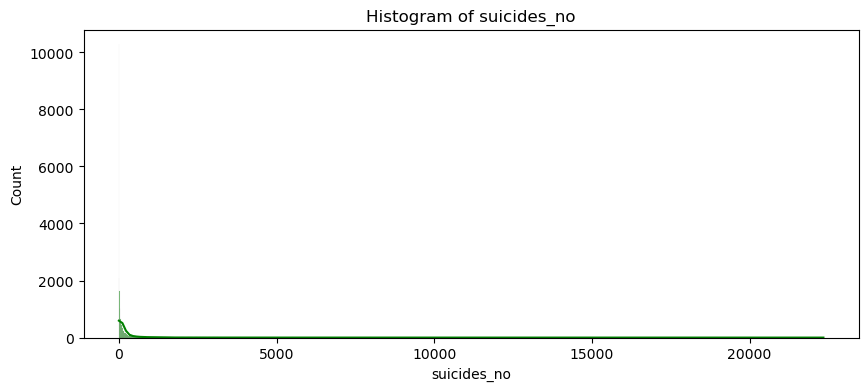

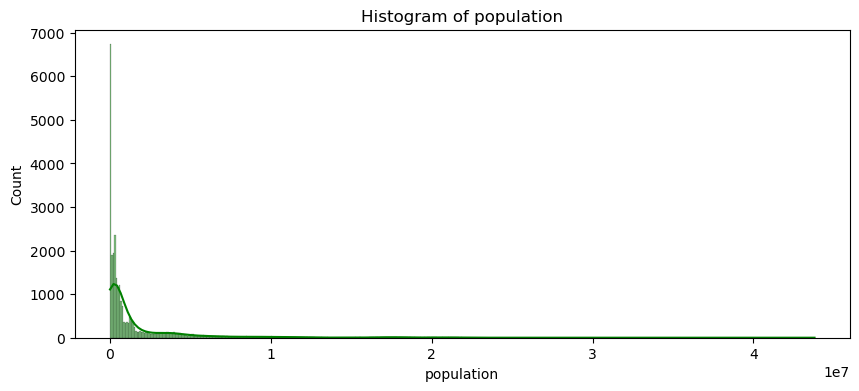

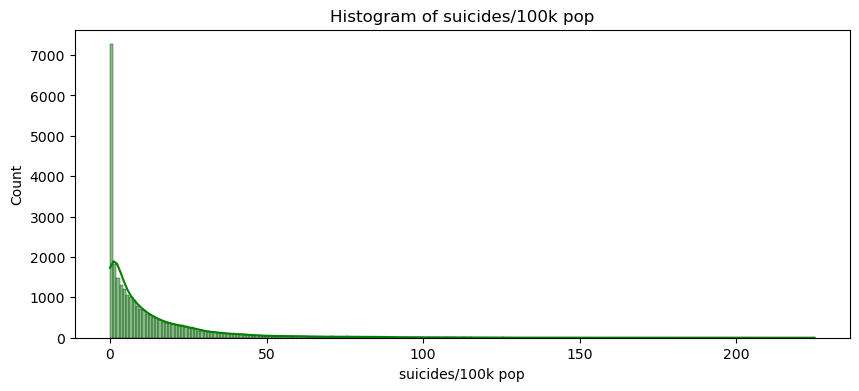

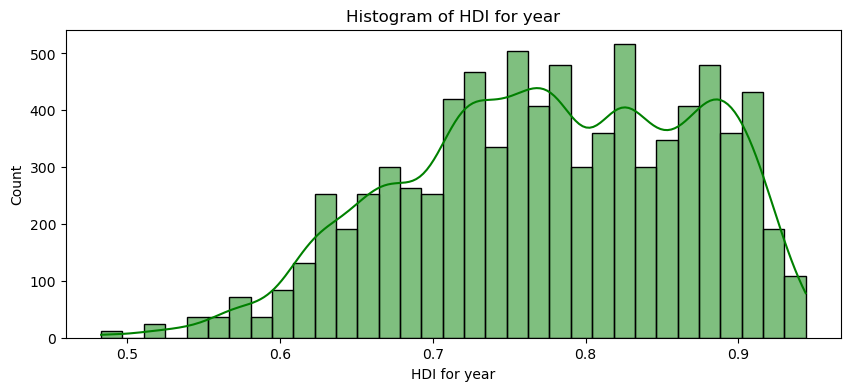

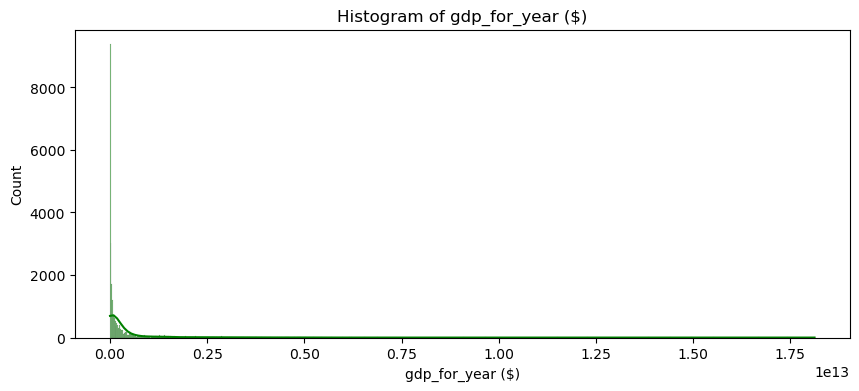

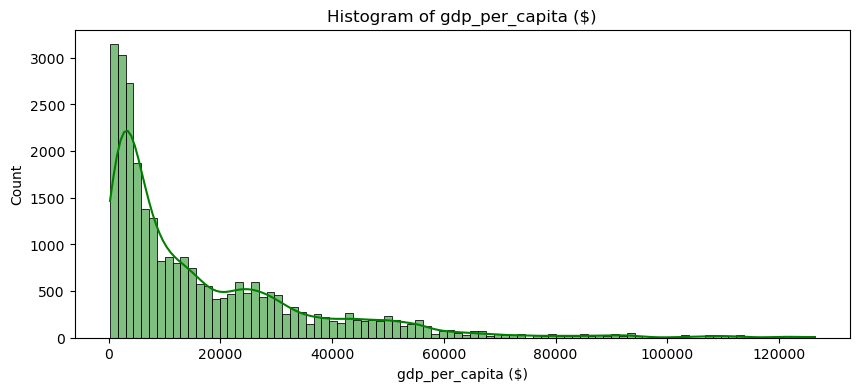

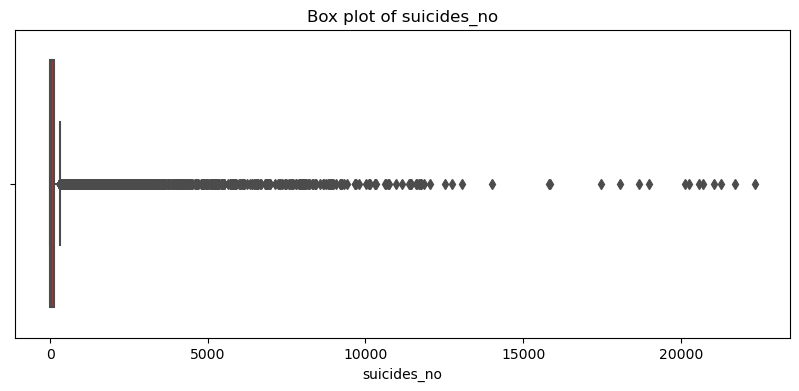

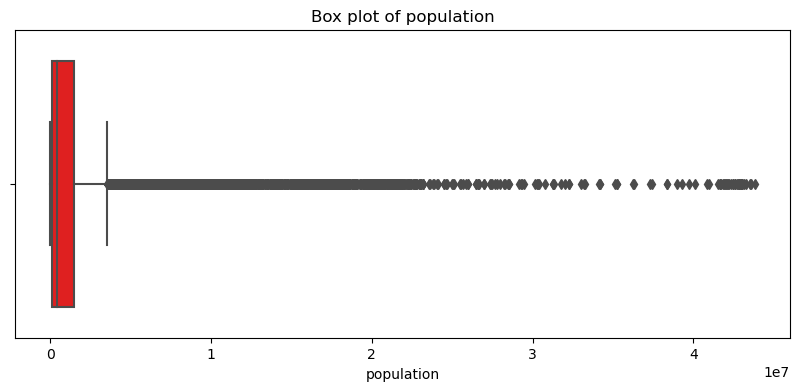

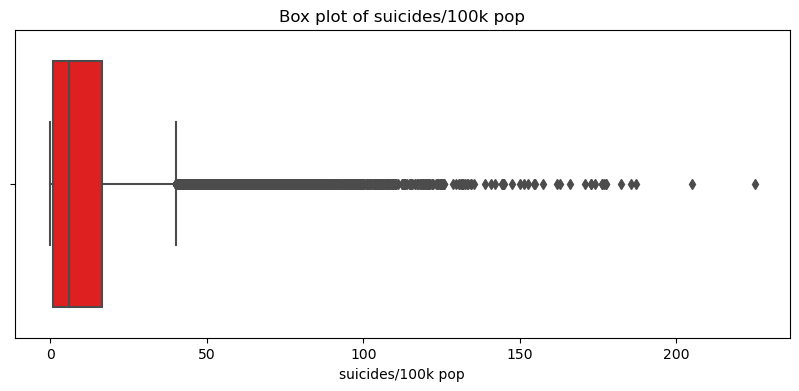

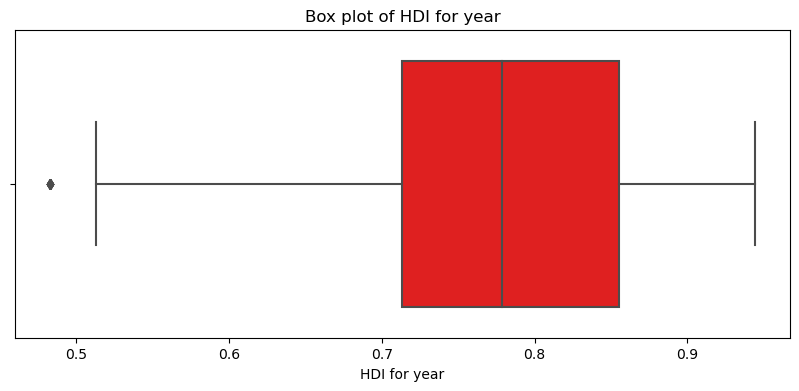

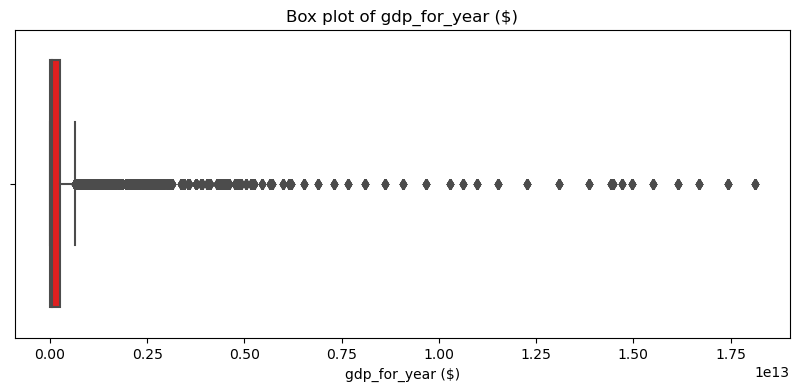

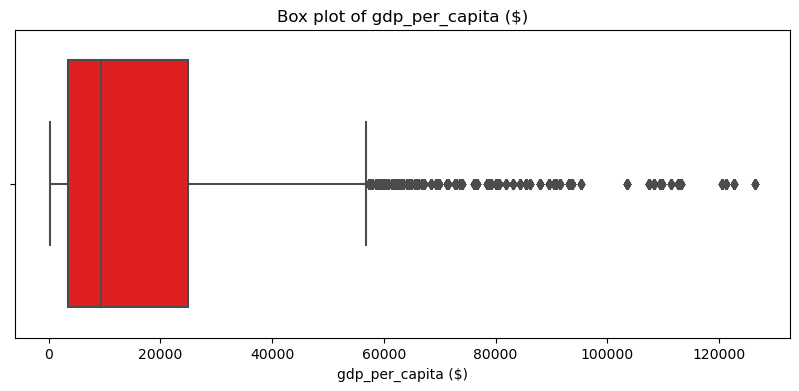

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
# Define numerical columns
numerical_cols = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)']

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col].dropna(), kde=True,color='green')
    plt.title(f'Histogram of {col}')
    plt.show()

# Box Plots
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col].dropna(), color='red')
    plt.title(f'Box plot of {col}')
    plt.show()


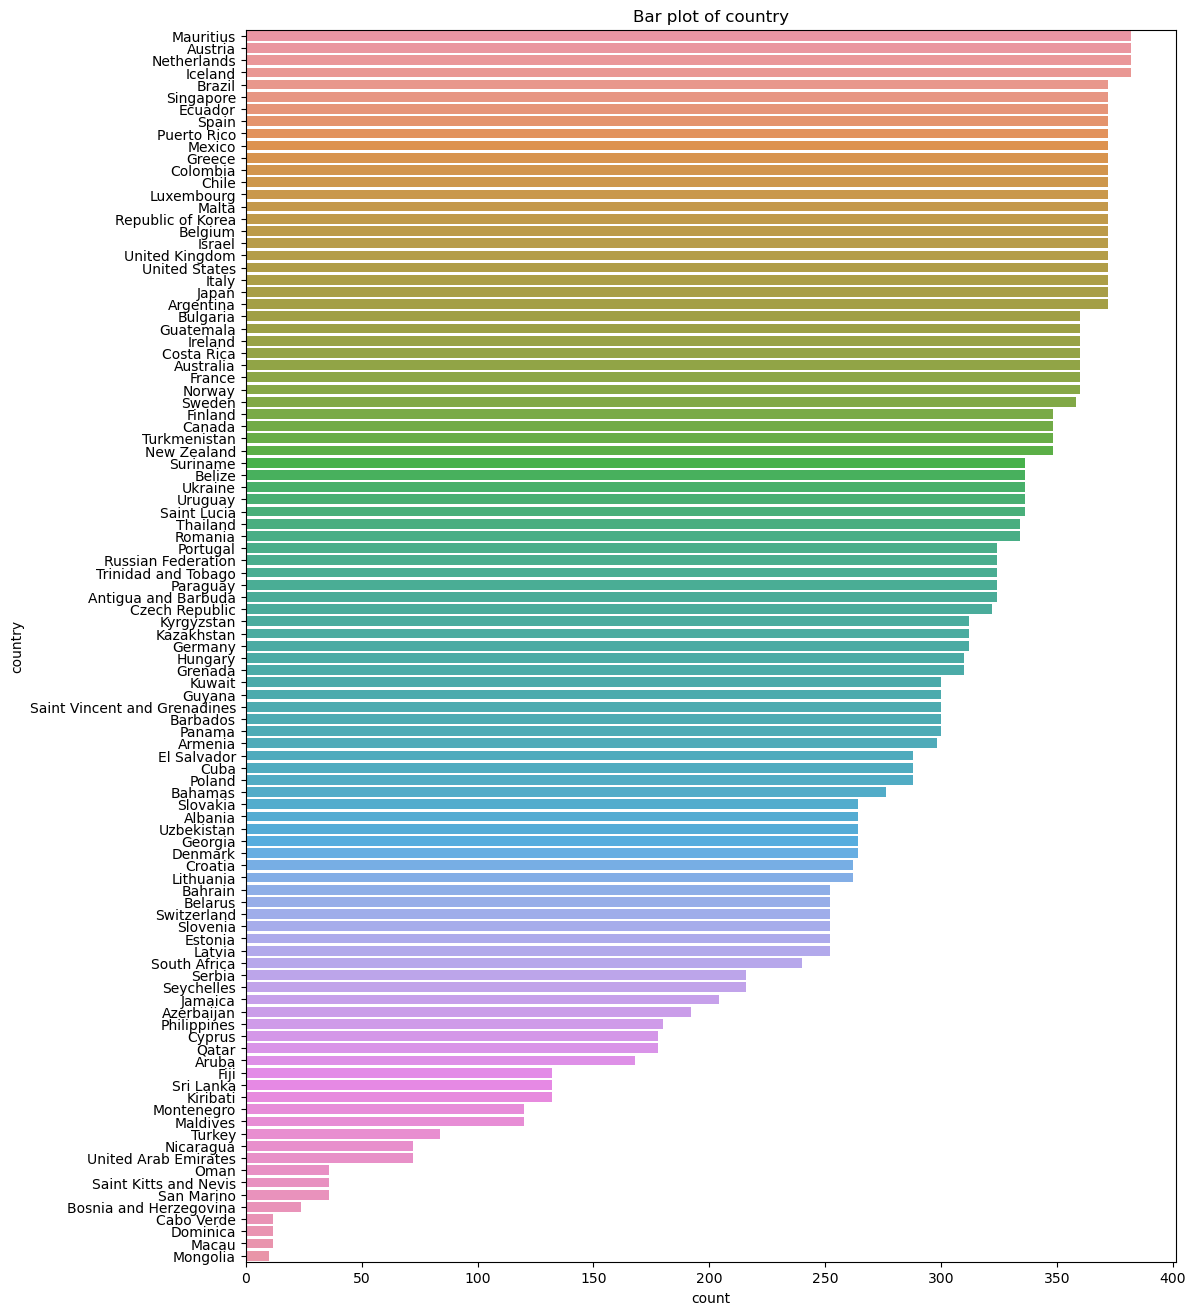

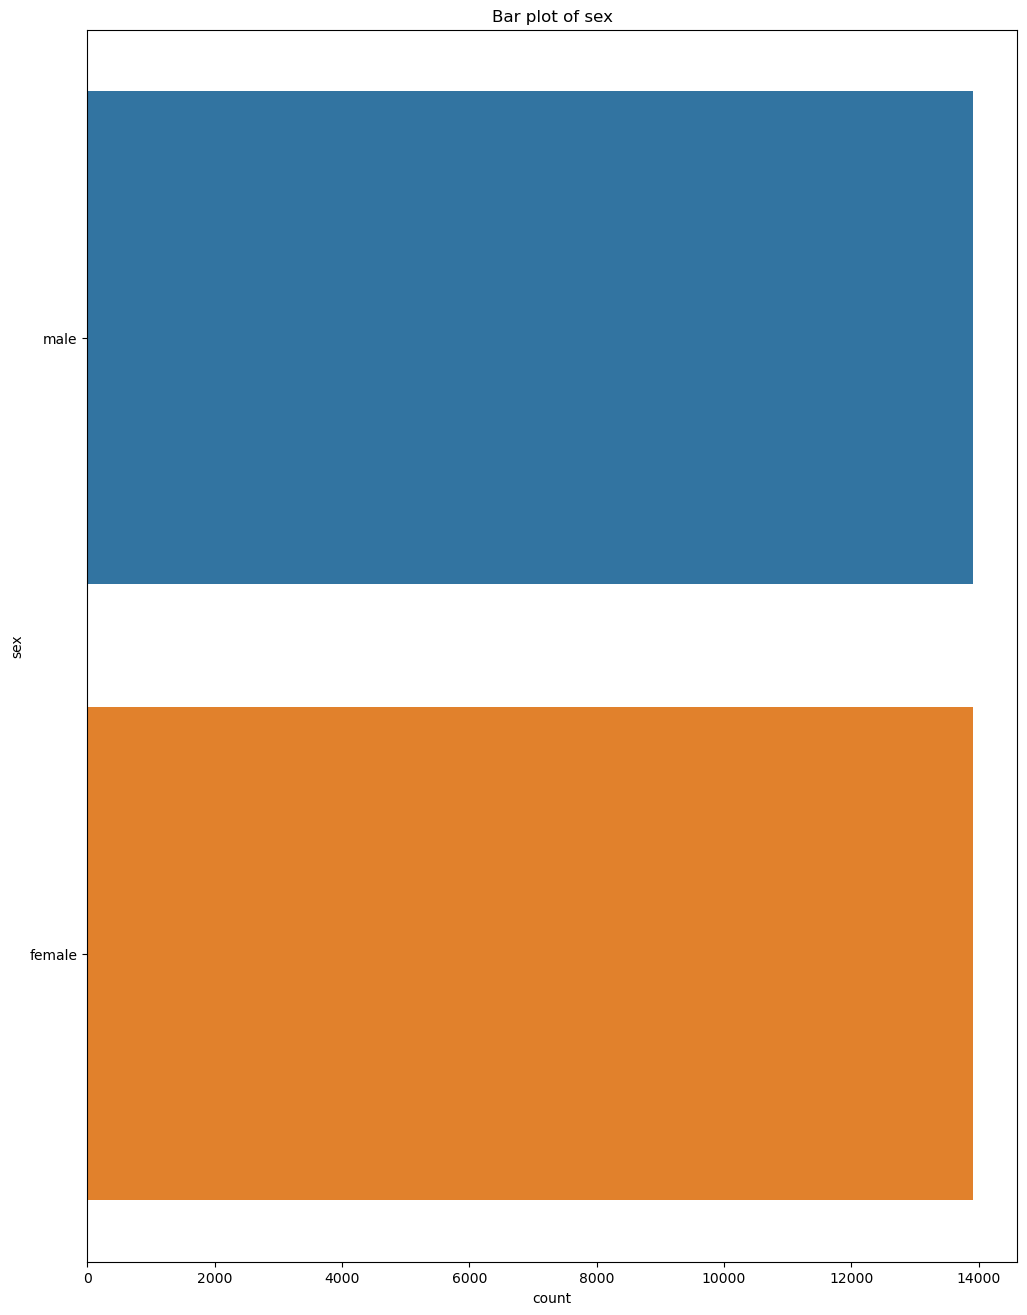

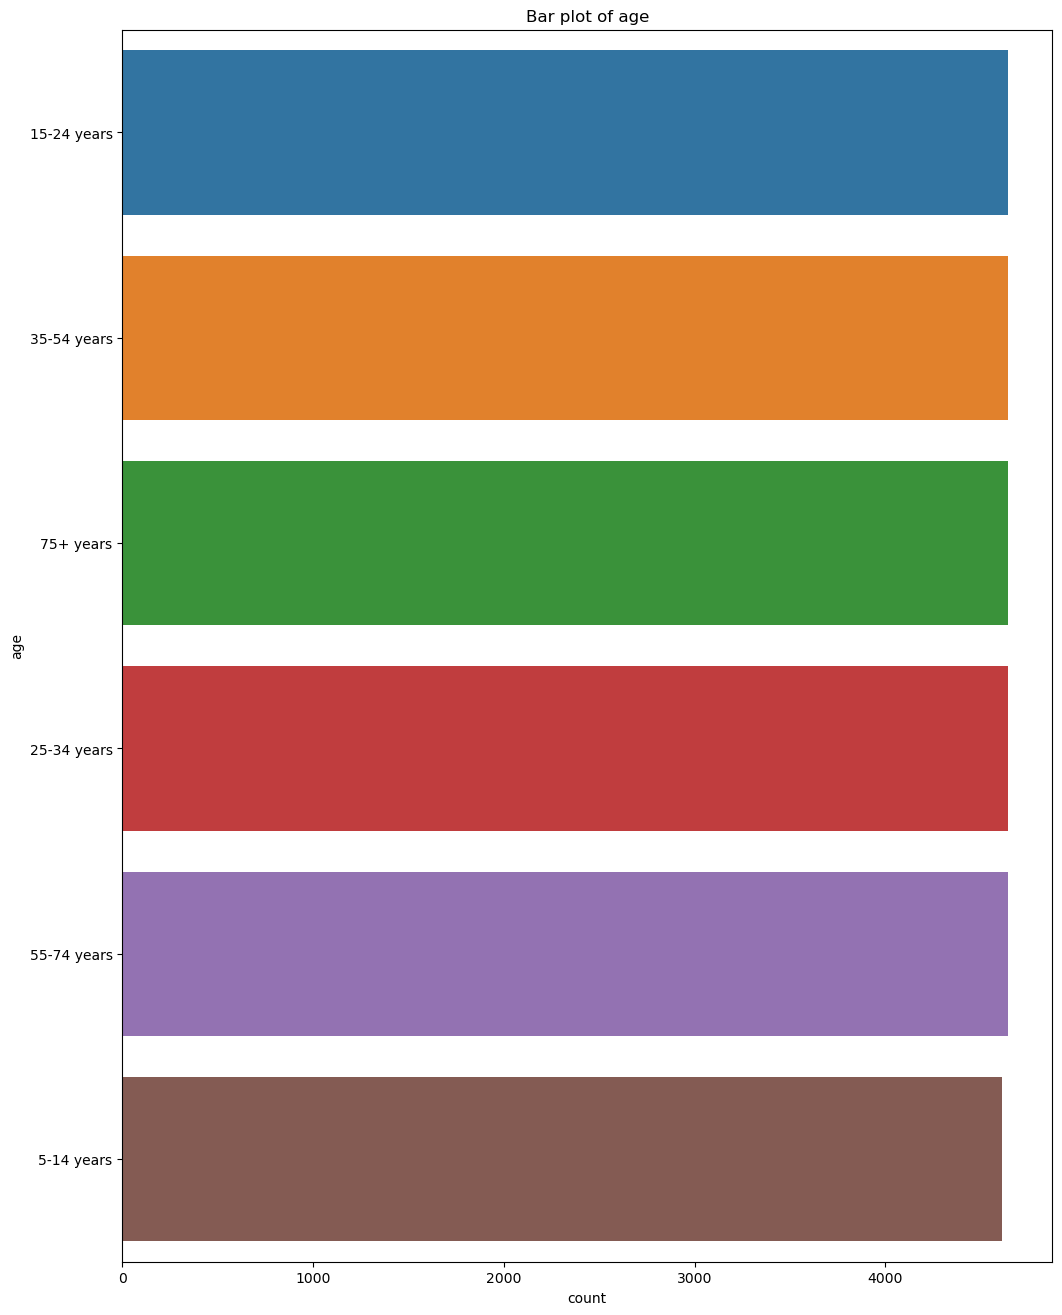

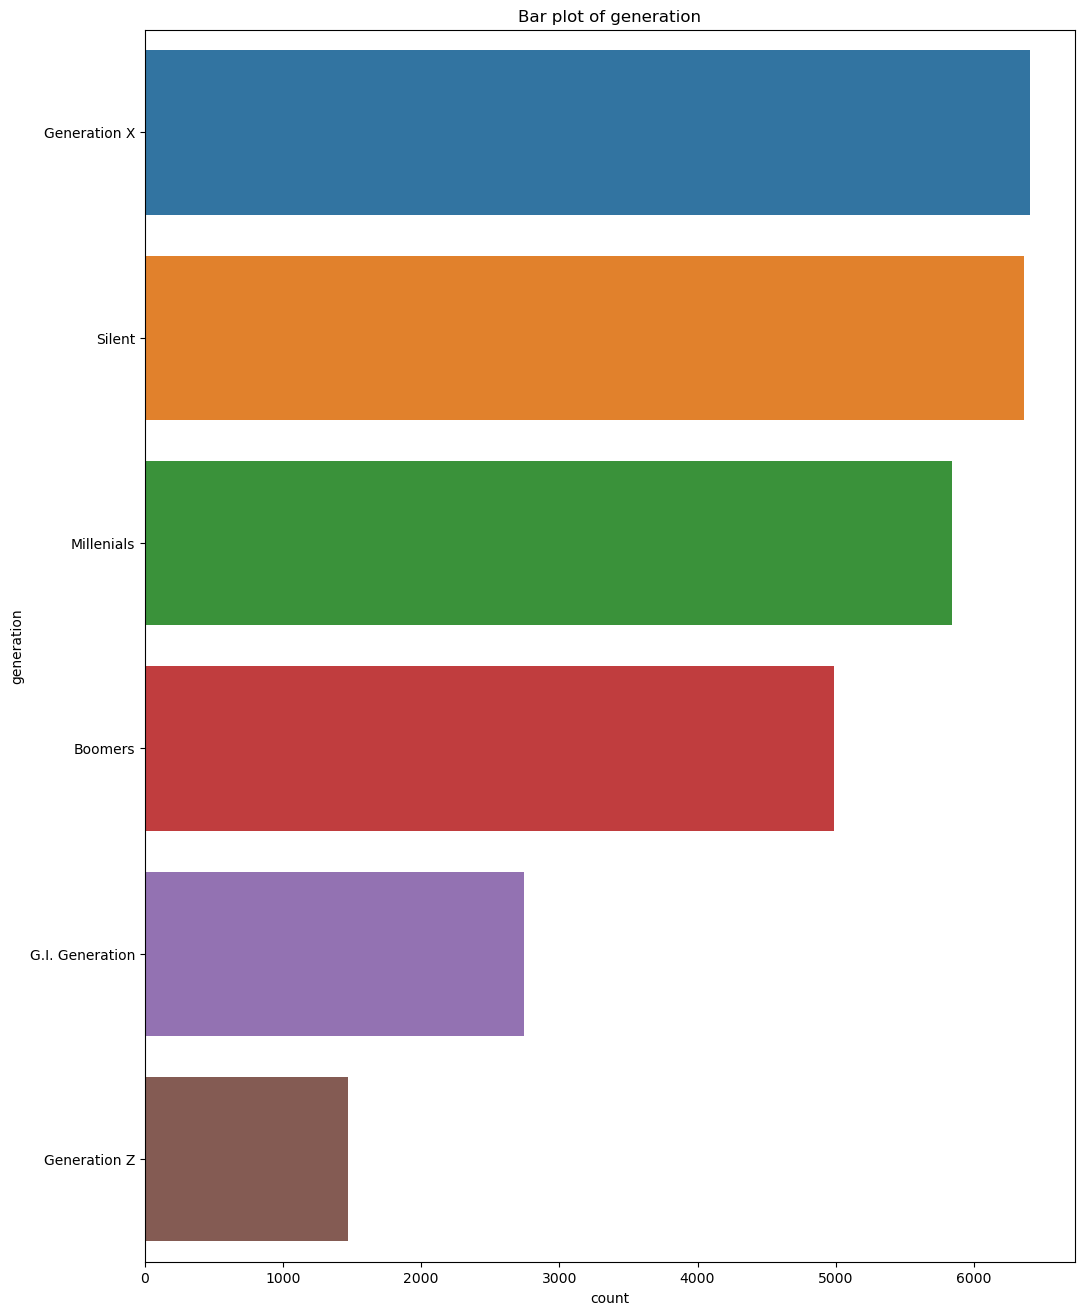

In [ ]:
# Define categorical columns
categorical_cols = ['country', 'sex', 'age', 'generation']

# Bar plots
for col in categorical_cols:
    plt.figure(figsize=(12, 16))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Bar plot of {col}')
    plt.show()


## Bivariate Analysis

C:\Users\Roshni\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


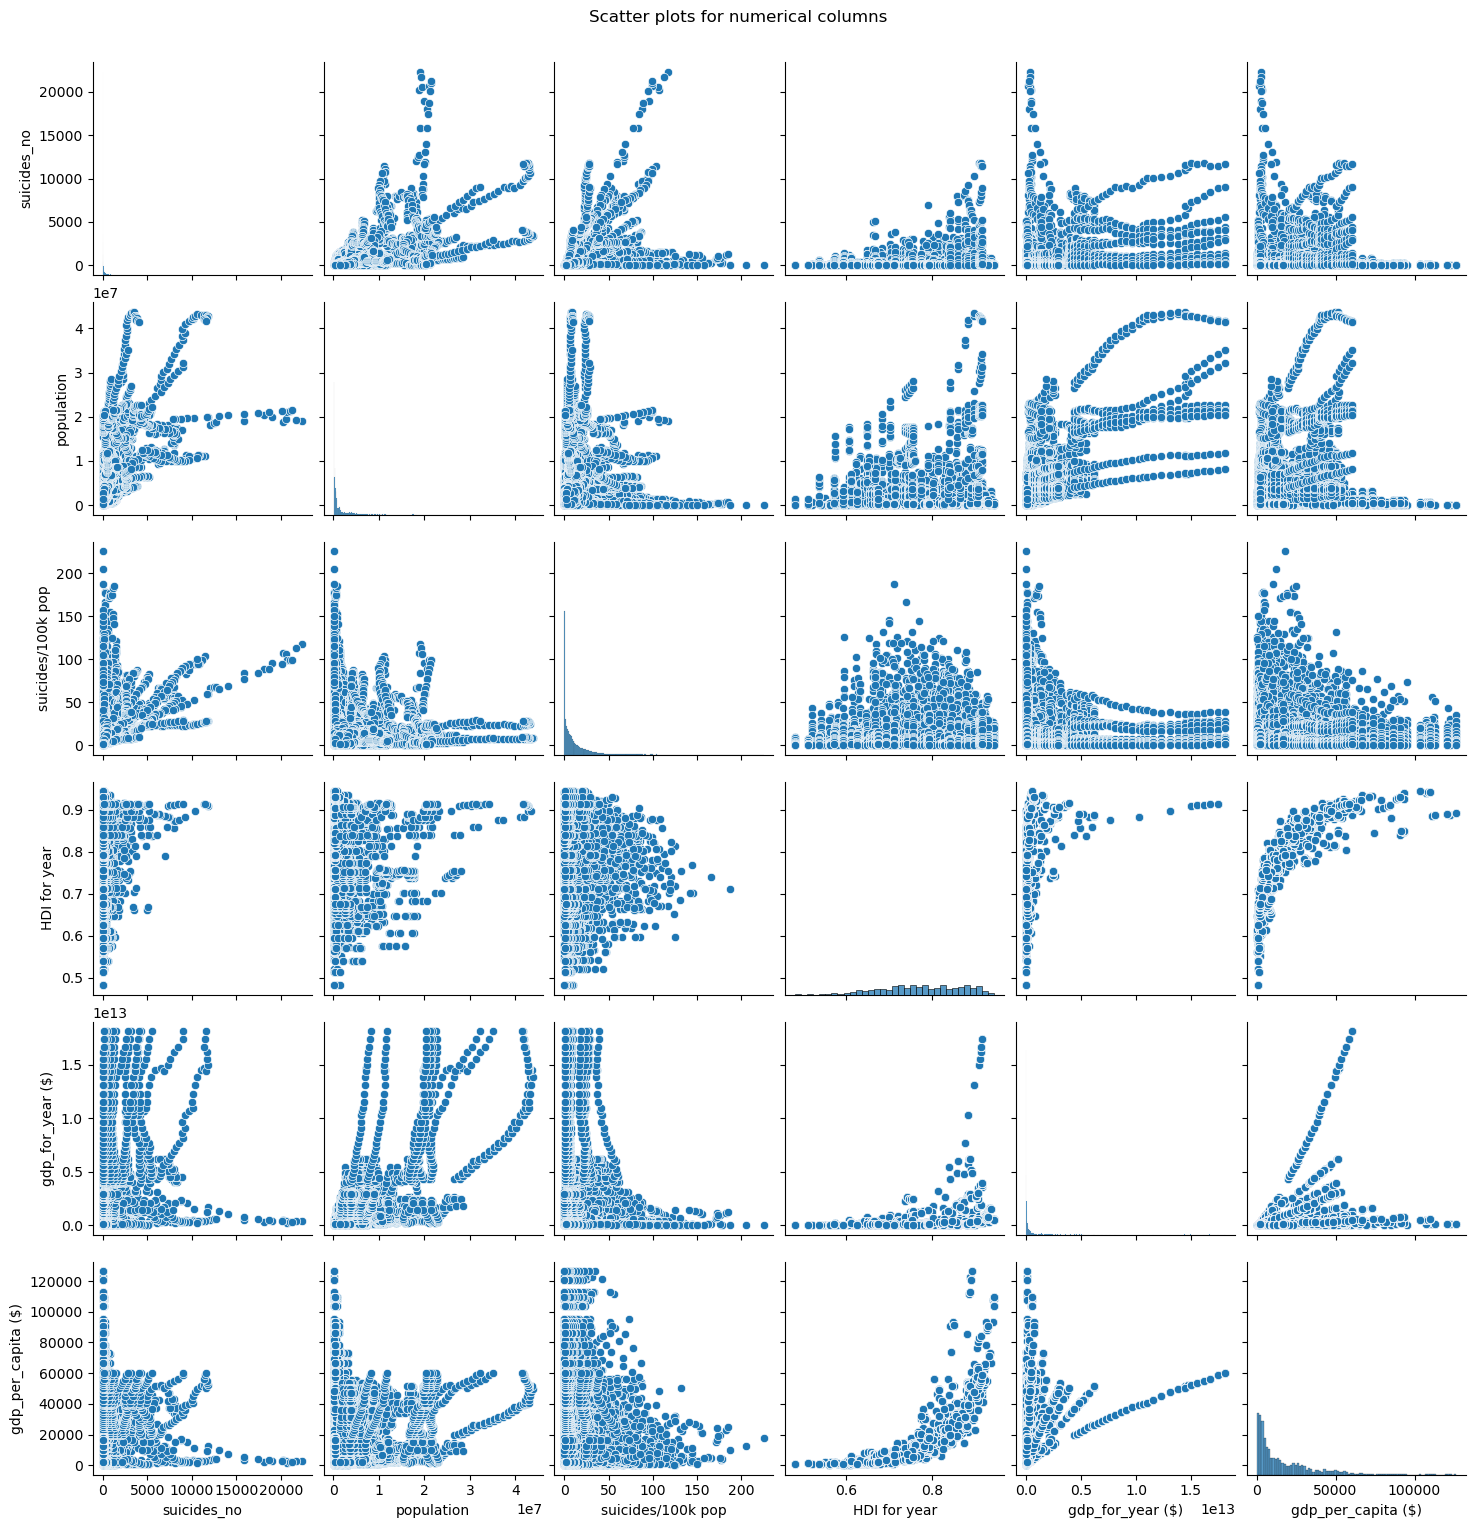

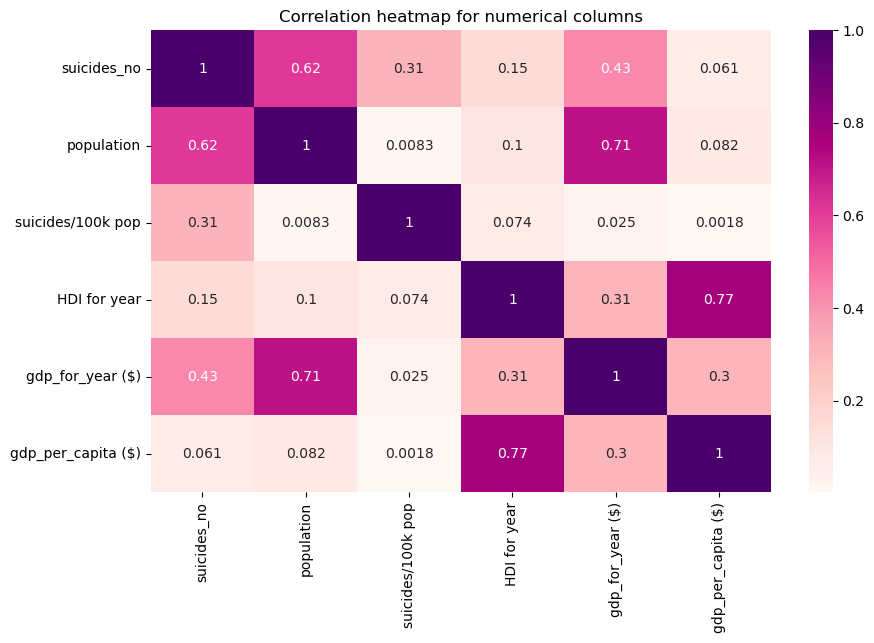

In [ ]:

# Scatter plots for pairs of numerical columns
sns.pairplot(data[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)']])
plt.suptitle('Scatter plots for numerical columns', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)']].corr(), annot=True, cmap='RdPu')
plt.title('Correlation heatmap for numerical columns')
plt.show()


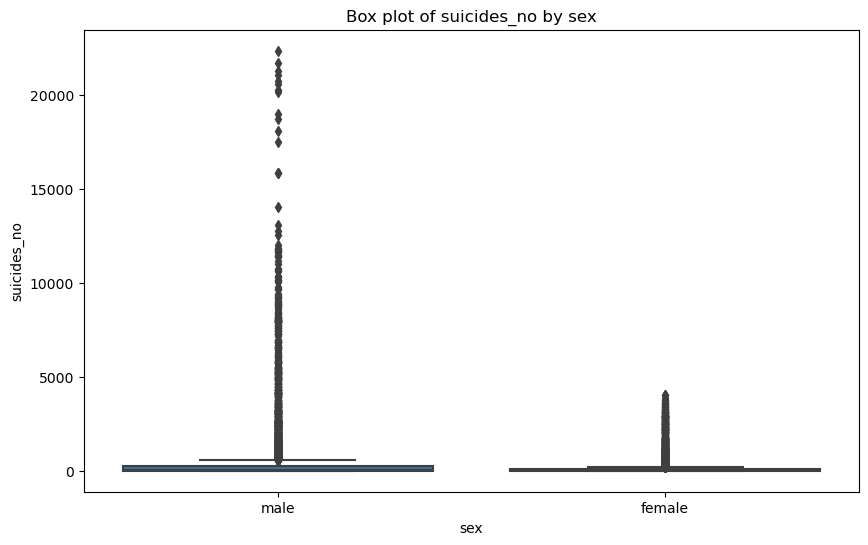

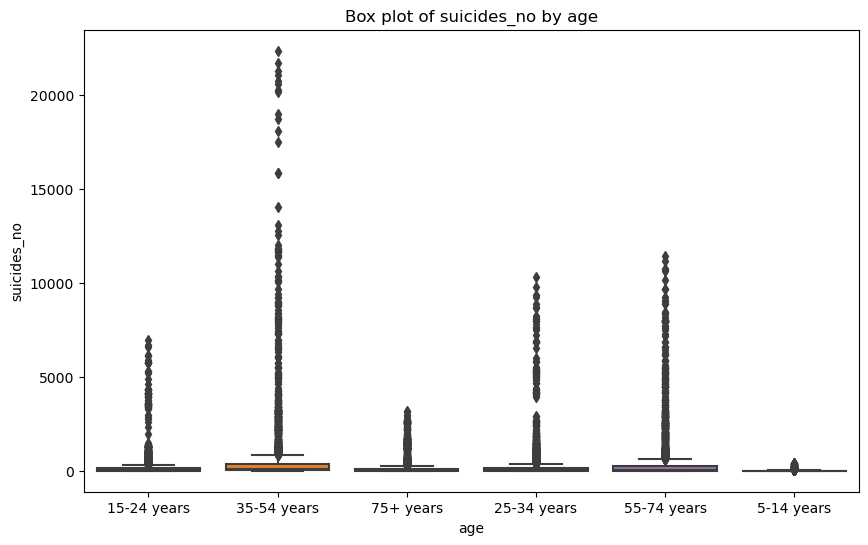

In [ ]:
# Box plot of suicides_no by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='suicides_no', data=data)
plt.title('Box plot of suicides_no by sex')
plt.show()

# Box plot of suicides_no by age
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='suicides_no', data=data)
plt.title('Box plot of suicides_no by age')
plt.show()


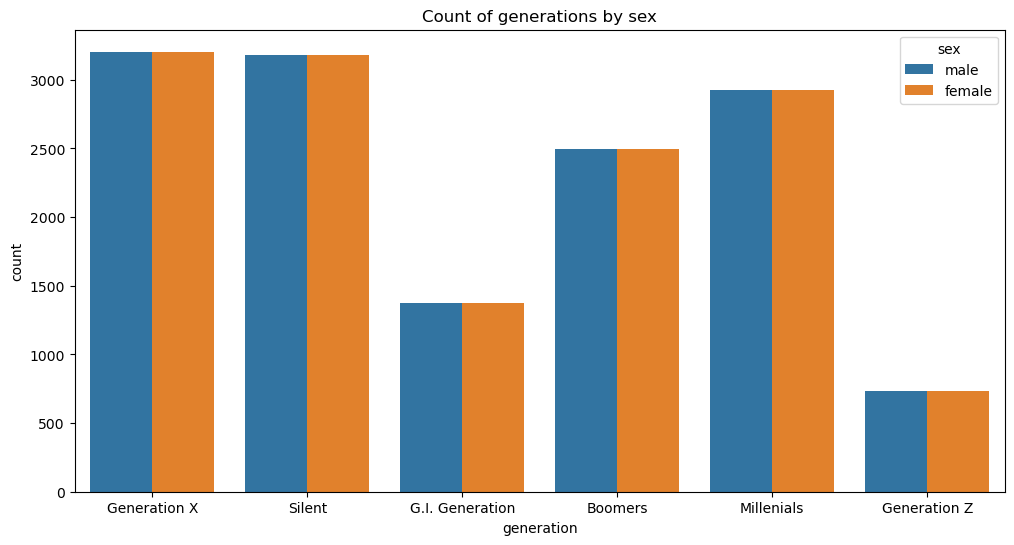

In [ ]:
# Grouped bar plot for sex and generation
plt.figure(figsize=(12, 6))
sns.countplot(x='generation', hue='sex', data=data)
plt.title('Count of generations by sex')
plt.show()


## Multivariate Analysis

C:\Users\Roshni\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


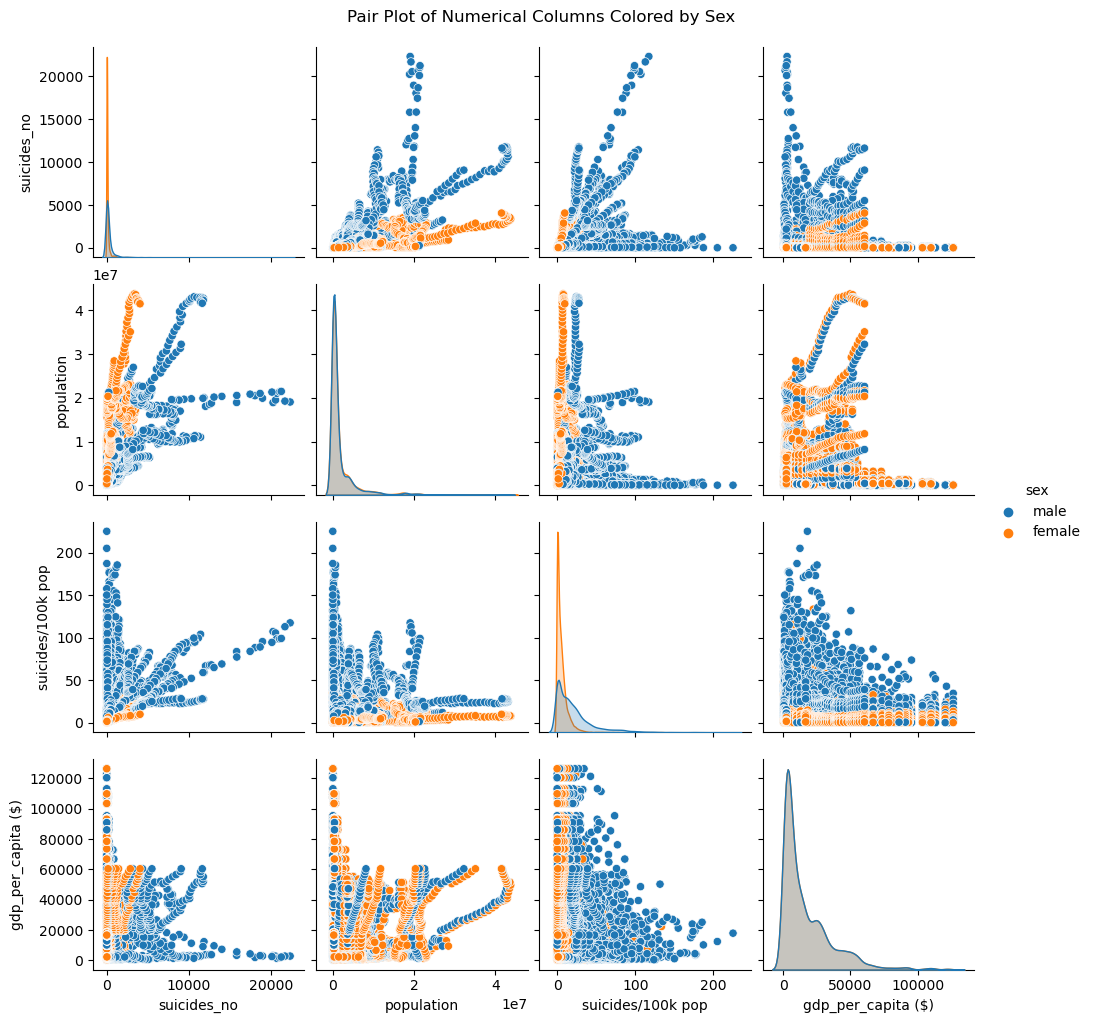

In [ ]:
sns.pairplot(data, hue='sex', vars=['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)'])
plt.suptitle('Pair Plot of Numerical Columns Colored by Sex', y=1.02)
plt.show()


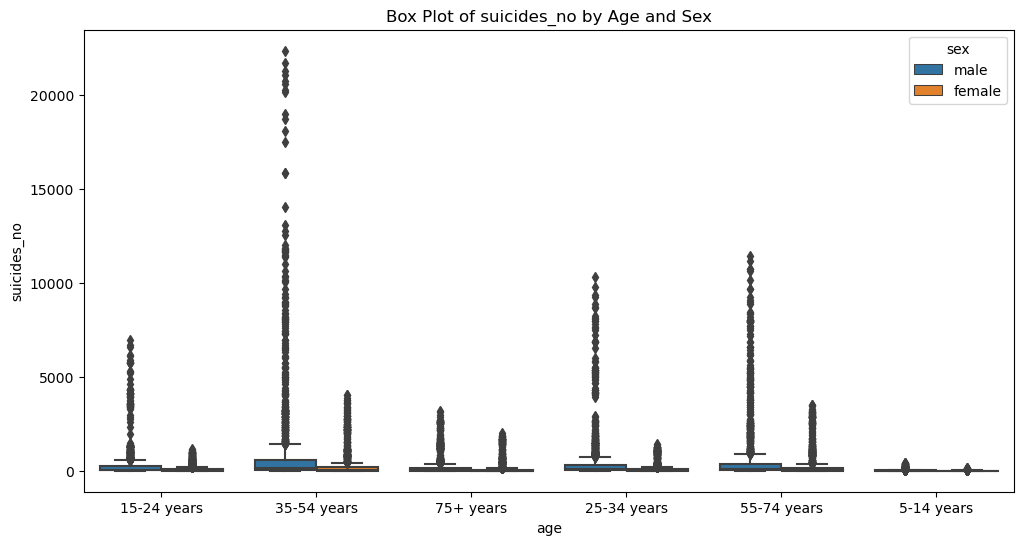

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='suicides_no', hue='sex', data=data)
plt.title('Box Plot of suicides_no by Age and Sex')
plt.show()


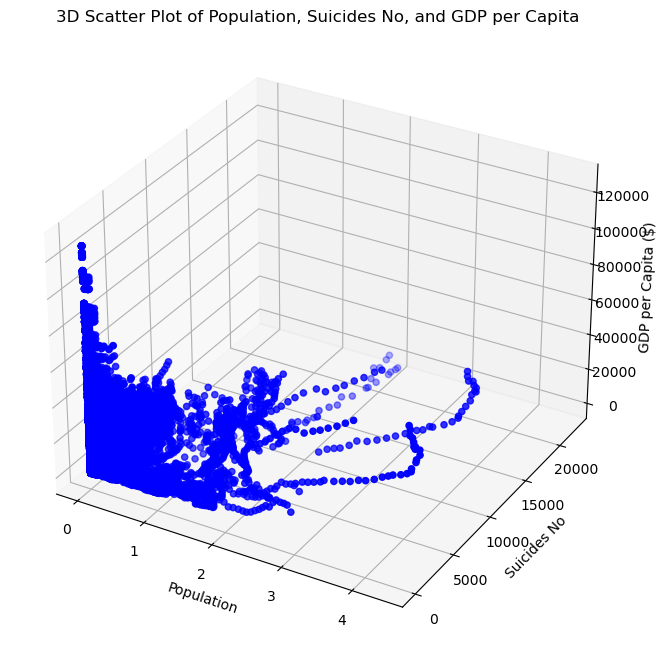

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['population'], data['suicides_no'], data['gdp_per_capita ($)'], c='b', marker='o')
ax.set_xlabel('Population')
ax.set_ylabel('Suicides No')
ax.set_zlabel('GDP per Capita ($)')
plt.title('3D Scatter Plot of Population, Suicides No, and GDP per Capita')
plt.show()


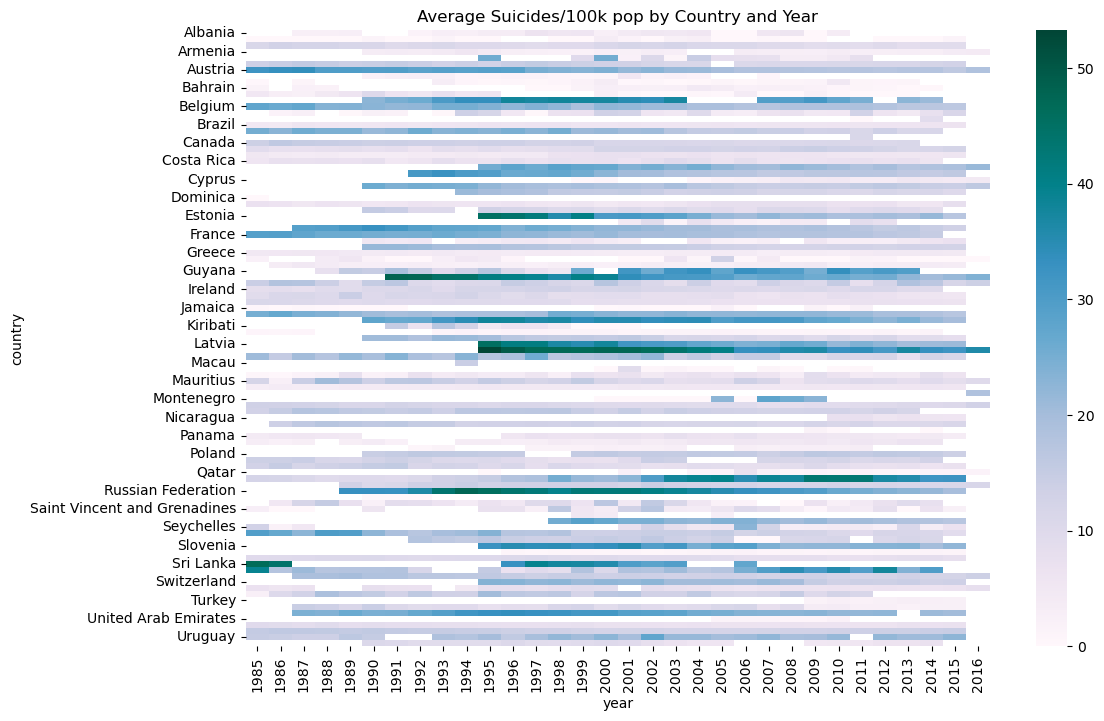

In [ ]:
# Pivot table for heatmap
heatmap_data = data.pivot_table(values='suicides/100k pop', index='country', columns='year', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='PuBuGn', annot=False)
plt.title('Average Suicides/100k pop by Country and Year')
plt.show()


C:\Users\Roshni\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


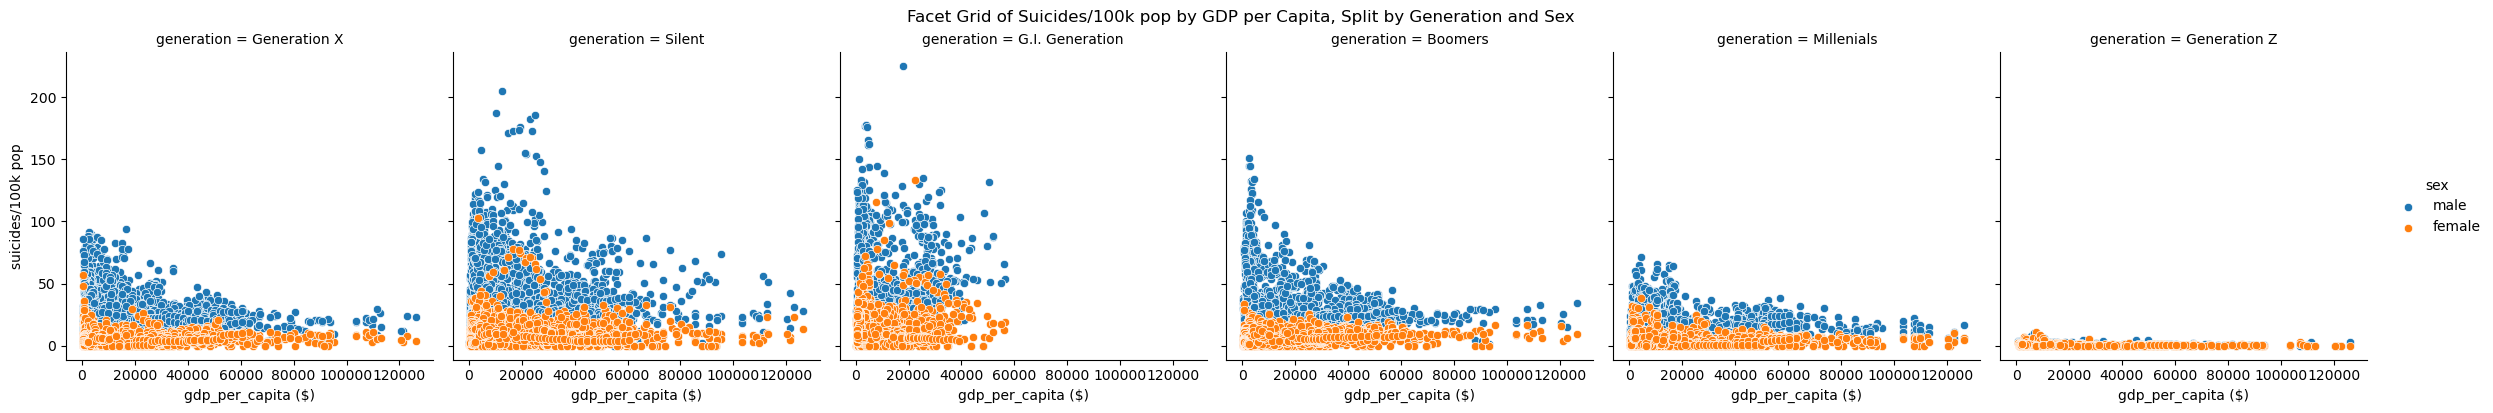

In [ ]:
g = sns.FacetGrid(data, col='generation', hue='sex', height=4, aspect=1)
g.map(sns.scatterplot, 'gdp_per_capita ($)', 'suicides/100k pop')
g.add_legend()
plt.suptitle('Facet Grid of Suicides/100k pop by GDP per Capita, Split by Generation and Sex', y=1.02)
plt.show()
